# Домашняя работа №1

**Срок сдачи:** 30 сентября 2016, 23:59 <br\>

При отправлении ДЗ на почту указывайте фамилию в названии файла, а тему письма оформляйте в следующем формате: <br\>
** [ИАД] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Table of Contents
 <p><div class="lev1 toc-item"><a data-toc-modified-id="Домашняя-работа-№1-1" href="#Домашняя-работа-№1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Домашняя работа №1</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Регрессия-с-SVM-(3-балла)-2" href="#Регрессия-с-SVM-(3-балла)"><span class="toc-item-num">2&nbsp;&nbsp;</span>Регрессия с SVM (3 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Визуализация-данных-(1-балл)-2.1" href="#Визуализация-данных-(1-балл)"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Визуализация данных (1 балл)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Обучение-моделей-(2-балла)-2.2" href="#Обучение-моделей-(2-балла)"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение моделей (2 балла)</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Определение-языка-слова-(7-баллов)-3" href="#Определение-языка-слова-(7-баллов)"><span class="toc-item-num">3&nbsp;&nbsp;</span>Определение языка слова (7 баллов)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Загрузка-(1-балл)-3.1" href="#Загрузка-(1-балл)"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Загрузка (1 балл)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Подготовка-данных-(2-балла)-3.2" href="#Подготовка-данных-(2-балла)"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка данных (2 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Расчет-ядра-(3-балла)-3.3" href="#Расчет-ядра-(3-балла)"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расчет ядра (3 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Оценка-качества-(1-балл)-3.4" href="#Оценка-качества-(1-балл)"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Оценка качества (1 балл)</a></div>

# Регрессия с SVM (3 балла)

SVM можно использовать и для задачи регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных и выведите их на графике.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('titanium.csv')

In [2]:
# смотрим, как выглядит датафрейм
print(data.head())

     x      y
0  585  0.644
1  595  0.622
2  605  0.638
3  615  0.649
4  625  0.652


In [3]:
#проверяем, нет ли пропущенных значений
data.isnull().count() == data.count()

x    True
y    True
dtype: bool

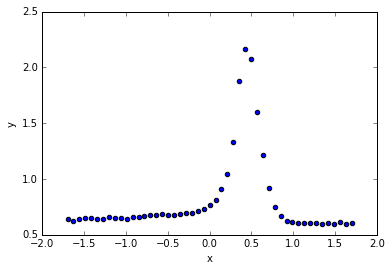

In [2]:
#масштабируем и визуализируем

from sklearn import preprocessing

data['x'] = preprocessing.scale(data['x'])

data.plot.scatter(x='x', y='y')

## Обучение моделей (2 балла)

Рассмотрим 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установите точность алгоритма оптимизации `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наилучшего параметра $C$ постройте график с данными и предсказанием с помощью SVM.

В каких случаях возникают эффекты недообучения, переобучения?

best C: 1519911.08295


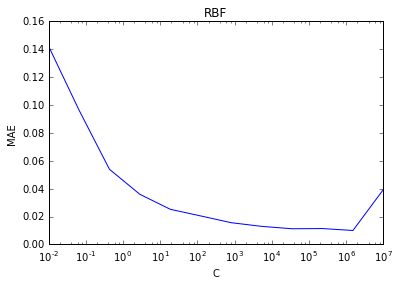

In [8]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

X = np.array(data['x']).reshape(49, 1)
y = np.array(data['y'])

C_range = np.logspace(-2, 7, 12)
mae = []

for c in C_range:
    svr_rbf = SVR(kernel='rbf', C=c, gamma=6, epsilon=0.01, coef0=1)
    y_rbf = svr_rbf.fit(X, y).predict(X)
    mae.append(mean_absolute_error(y, y_rbf))
    
print('best C:', C_range[mae.index(min(mae))])
plt.title("RBF")
plt.plot(C_range, mae)    
plt.xlabel('C')
plt.ylabel('MAE')
plt.xscale('log')


best C: 88


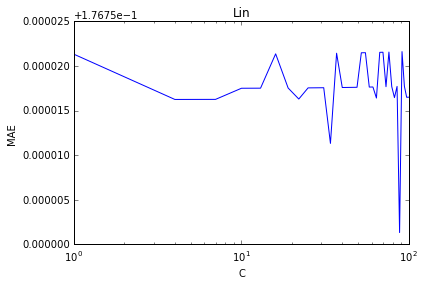

In [7]:
C_range = np.arange(1, 102, 3)
mae_lin = []

for c in C_range:
    svr_lin = SVR(kernel='linear', C=c, epsilon=0.01)
    y_lin = svr_lin.fit(X, y).predict(X)
    mae_lin.append(mean_absolute_error(y, y_lin))


print('best C:', C_range[mae_lin.index(min(mae_lin))])
plt.title("Lin")
plt.plot(C_range, mae_lin)
plt.xlabel('C')
plt.ylabel('MAE')
plt.xscale('log')


best C: 37


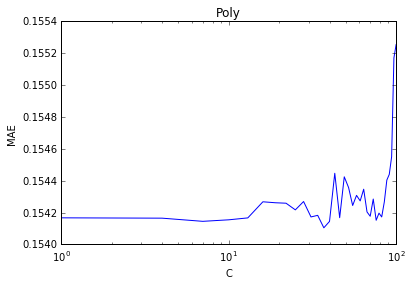

In [9]:
C_range = np.arange(1, 102, 3)
mae_poly = []

for c in C_range:
    svr_poly = SVR(kernel='poly', C=c, epsilon=0.01, coef0=1, degree = 3, gamma = 6)
    y_poly = svr_poly.fit(X, y).predict(X)
    mae_poly.append(mean_absolute_error(y, y_poly))
    
print('best C:', C_range[mae_poly.index(min(mae_poly))])    
plt.title("Poly")
plt.plot(C_range, mae_poly)
plt.xlabel('C')
plt.ylabel('MAE')
plt.xscale('log')


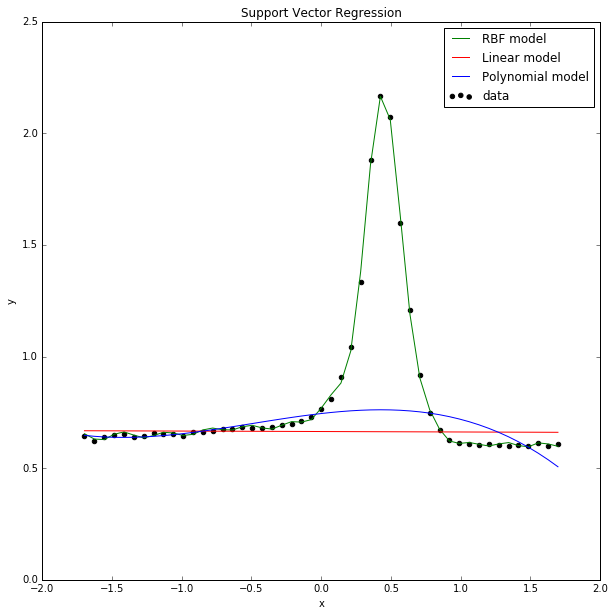

In [12]:
svr_rbf = SVR(kernel='rbf', C=1519911.08295, gamma=6, epsilon=0.01, coef0=1)
svr_lin = SVR(kernel='linear', C=88, epsilon=0.01)
svr_poly = SVR(kernel='poly', C=37, epsilon=0.01, coef0=1, degree = 3, gamma = 6)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

plt.figure(figsize = (10, 10))
plt.scatter(X, y, c='k', label='data')
plt.hold('on')
plt.plot(X, y_rbf, c='g', label='RBF model')
plt.plot(X, y_lin, c='r', label='Linear model')
plt.plot(X, y_poly, c='b', label='Polynomial model')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

В каких случаях возникают эффекты недообучения, переобучения?

Переобучение: RBF модель с С=1519911.08295 на других данных явно выдаст результат намного хуже

Недообучение: возможно, в других моделях надо было брать другой интервал для С, чтобы результат получился лучше. Линейная модель не подходит для данных в этом задании, поэтому всегда будет сильно ошибаться.

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Даны два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова.

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [14]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

datawp = [[], []]
filelist = ['war_and_peace_es.txt', 'war_and_peace_en.txt']
for i in range(len(filelist)):
    datawp[i] = pd.read_csv(filelist[i], names=['word', 'label'])
    datawp[i]['label'] = i
datawp = pd.concat(datawp)

In [15]:
# like this

df.head()

,word,label
0,guerra,0
1,pace,0
2,lev,0
3,nicoevic,0
4,tolstj,0


In [194]:
datawp.head()

,word,label
0,guerra,0
1,pace,0
2,lev,0
3,nicoevic,0
4,tolstj,0


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [15]:
from sklearn.cross_validation import train_test_split

In [16]:
RND_SEED = 42
datawp = datawp.sample(n=1000).reset_index(drop=True)
datawp['index'] = datawp.index

X = datawp['index']                                       
y = datawp['label']                                           

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=RND_SEED) 

datawp.head()

,word,label,index
0,cranio,0,0
1,minaccia,0,1
2,luccisione,0,2
3,and,1,3
4,sat,1,4


## Расчет ядра (3 балла)

Теперь напишем собственное ядро для классификации строк. Для сравнения строк будем использовать [расстояние Левенштейна](https://ru.wikipedia.org/wiki/Расстояние_Левенштейна). Реализацию этого расстояния можно получить одним из двух способов:
* скопировать функцию wfi_levenshtein из файла [pylev.py](https://github.com/toastdriven/pylev/blob/master/pylev.py)
* поставить пакет [editdistance](https://pypi.python.org/pypi/editdistance) (будет работать быстрее, чем предыдущая реализация, но могут возникнуть проблемы с установкой)

Ядро для сравнения строк должно принимать максимальное значение, когда слова одинаковы, и минимальное, когда очень отличаются. Это противоположно свойствам расстояния Левенштейна: оно равно 0, когда слова одинаковы, и максимально, когда слова разные. Поэтому подставьте значение расстояния Левенштейна в какое-нибудь ядро, зависящее от расстояния между объектами (например, гауссовское).

Функция, реализующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во время обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).
Функция должна возвращать матрицу значений ядра для всех объектов попарно: $G_{ij} = K(U_i, V_j)$. Здесь $U_i$ — i-ый объект выборки $U$, а $V_j$ — j-ый объект выборки $V$.

Сделайте следующее:
1. Напишите функцию *string_kernel(U, V)*, расчитывающую матрицу ядра $G_{ij}$
2. Визуализируйте матрицу только для тренировочной выборки (функция plt.imshow()).


In [17]:
def wfi_levenshtein(string_1, string_2):
    """
    Calculates the Levenshtein distance between two strings.
    This version uses an iterative version of the Wagner-Fischer algorithm.
    Usage::
        >>> wfi_levenshtein('kitten', 'sitting')
        3
        >>> wfi_levenshtein('kitten', 'kitten')
        0
        >>> wfi_levenshtein('', '')
        0
    """
    if string_1 == string_2:
        return 0

    len_1 = len(string_1)
    len_2 = len(string_2)

    if len_1 == 0:
        return len_2
    if len_2 == 0:
        return len_1

    if len_1 > len_2:
        string_2, string_1 = string_1, string_2
        len_2, len_1 = len_1, len_2

    d0 = [i for i in range(len_2 + 1)]
    d1 = [j for j in range(len_2 + 1)]

    for i in range(len_1):
        d1[0] = i + 1
        for j in range(len_2):
            cost = d0[j]

            if string_1[i] != string_2[j]:
                # substitution
                cost += 1

                # insertion
                x_cost = d1[j] + 1
                if x_cost < cost:
                    cost = x_cost

                # deletion
                y_cost = d0[j + 1] + 1
                if y_cost < cost:
                    cost = y_cost

            d1[j + 1] = cost

        d0, d1 = d1, d0

    return d0[-1]

In [18]:
def string_kernel(U, V):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i, u in enumerate(U):
        for j, v in enumerate(V):
            G[i, j] = np.exp(- np.sum( np.power(wfi_levenshtein(datawp['word'][u], datawp['word'][v]),2) ) / float(2* (0.9**2) ) )
    return G

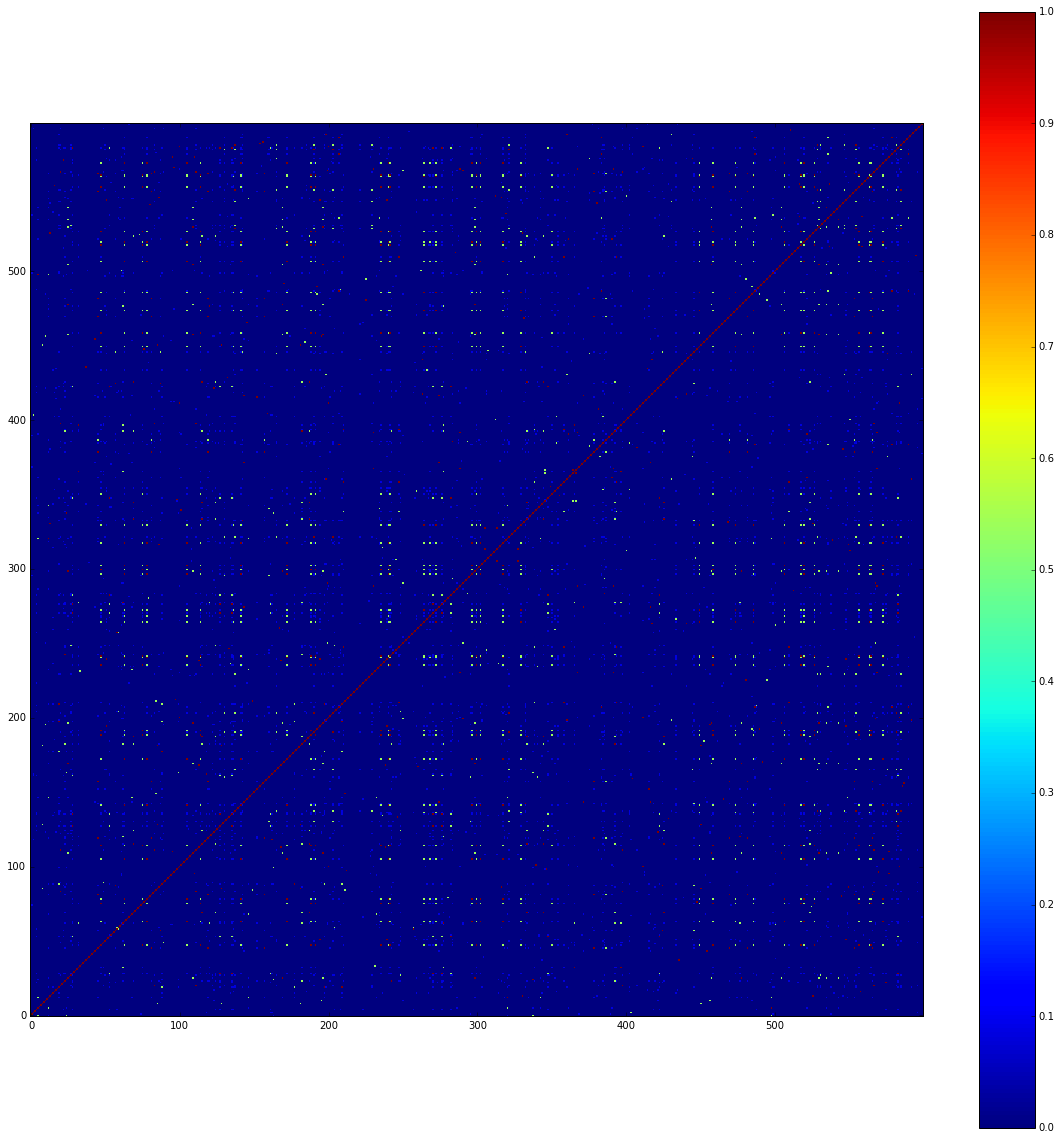

In [50]:
kernel_str = string_kernel(X_train, X_train)


plt.figure(figsize=(20, 20))
plt.imshow(kernel_str, interpolation='nearest', origin="lower")
plt.colorbar()
plt.show()

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке. Для улучшения качества можно увеличить размер тренировочной выборки. Но тогда обучение будет происходить дольше.

In [19]:
C_range = np.logspace(-2, 4, 7)

from sklearn.svm import SVC
for c in C_range:
    clf = SVC(C = c, kernel="precomputed")
    model = clf.fit(string_kernel(X_train,X_train), y_train)
    p_train = model.predict( string_kernel(X_train, X_train) )
    correct_tr = np.array([y_train == p_train]).flatten()                                       
    percentage_tr = (float(np.sum(correct_tr)) / float(len(correct_tr))) * 100
    print ('train:', percentage_tr, '%')
    p_test = model.predict( string_kernel(X_test, X_train) )
    correct_test = np.array([y_test == p_test]).flatten()                                       
    percentage_test = (float(np.sum(correct_test)) / float(len(correct_test))) * 100
    print ('test:', percentage_test, '%')
    print('---------')

train: 54.166666666666664 %
test: 58.5 %
---------
train: 59.166666666666664 %
test: 63.0 %
---------
train: 98.83333333333333 %
test: 80.75 %
---------
train: 99.0 %
test: 80.5 %
---------
train: 99.0 %
test: 80.5 %
---------
train: 99.0 %
test: 80.5 %
---------
train: 99.0 %
test: 80.5 %
---------
